## Binomial Distributions

In [109]:
import sys
import pandas as pd
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn')

print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}\n\
Matplotlib {mpl.__version__}\n" ) 

Python 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
Pandas 2.0.3
NumPy 1.26.2
Matplotlib 3.7.0



C:\Users\rastu\AppData\Local\Temp\ipykernel_17796\2785105329.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Define functions

In [128]:
def fact(n):
    fact = 1
    for i in range(1, n+1):
        fact = fact * i
    return fact

def permutation(all, choose) -> float:
    ### nPr represents the number of ways to arrange r items chosen from a set of n items, where the order of the arrangement matters.
    ### returning the number of all events
    return fact(all)/fact(all - choose)

def combination(all, choose) -> float:
    ### nCr represents the number of ways to choose r items from a set of n items, where the order of selection does not matter. 
    ### returning the number of all events
    return fact(all)/( fact(choose) * fact(all - choose) )

def rand_simulation(n_simulate, n_samples, success_rate) -> str:
    score = []
    for i in range(n_simulate):
        pos_count = 0
        for j in range(n_samples):
            r = random.random()
            if r >= success_rate :
                pass
            else :
                # print('Positive')
                pos_count += 1

        score.append(pos_count)

    x = score.count(10)

    return "we got 10/10 at : {a} from {b}\nTotal percent : {c:.4f} %".format(a = x, b = n_simulate, c = ((x / n_simulate) * 100))

def get_success_rate(n_simulate, n_samples, success_rate) -> dict:
    score = {'n_pos': [], 'counts': [], 'p_counts' : []}
    for items in score.keys() :
        for cc in range(n_samples + 1):
            if items == 'n_pos' :
                score[items].append(cc)
            else :
                score[items].append(0)

    for i in range(n_simulate):
        pos_count = 0
        for j in range(n_samples):
            r = random.random()
            if r >= success_rate :
                pass
            else :
                # print('Positive')
                pos_count += 1

        score['counts'][pos_count] += 1
        score['p_counts'][pos_count] = (pos_count / n_simulate) * 100

    return score

In [93]:
combination(52,5)

2598960.0

In [122]:
score = {'n_pos': [0,1,2], 'counts': [0,1,2], 'p_counts' : [0,1,2]}
for i in score.keys():
    print(i)

n_pos
counts
p_counts


## Random

In [100]:
n_simulate = 100
n_samples = 10
success_rate = 0.95

print(rand_simulation(n_simulate, n_samples, success_rate))

we got 10/10 at : 68 from 100
Total percent : 68.0000 %


In [129]:
n_simulate = 200
n_samples = 10
success_rate = 0.95

df = pd.DataFrame.from_dict(
    get_success_rate(n_simulate, n_samples, success_rate)
)

In [130]:
df

,n_pos,counts,p_counts
0,0,0,0.0
1,1,0,0.0
2,2,0,0.0
3,3,0,0.0
4,4,0,0.0
5,5,0,0.0
6,6,0,0.0
7,7,3,3.5
8,8,14,4.0
9,9,69,4.5


### Plot

Text(0, 0.5, 'Probability of x (%)')

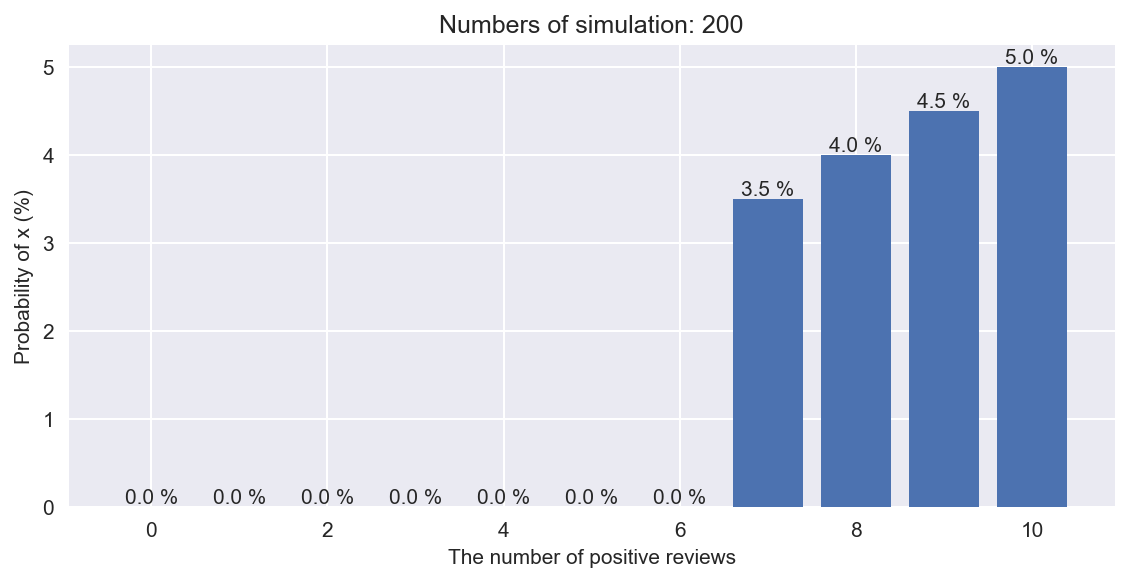

In [137]:
plt.figure(figsize=(9,4),dpi=150)

# Plot 
bars = plt.bar(x=df.n_pos,
        height=df.p_counts,
        )

# Annotating bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(),
        f'{bar.get_height():.1f} %', 
        ha='center', 
        va='bottom', 
        fontsize=10,
             )

plt.title(f"Numbers of simulation: {n_simulate}")
plt.xlabel("The number of positive reviews")
plt.ylabel("Probability of x (%)")
